In [1]:
%pylab inline
import sympy as sym
from sympy import init_printing ; init_printing()
from IPython.display import display, Math, Latex
maths = lambda s: display(Math(s))
latex = lambda s: display(Latex(s))

Populating the interactive namespace from numpy and matplotlib


Define the Beta distribution (symbolically using sympy) which will act as our prior distribution

In [2]:
a,b,mu = sym.symbols('a b mu')
G = sym.gamma

# The normalisation factor
Beta_norm = G(a + b)/(G(a)*G(b))
# The functional form, note the similarity
# to the Binomial likelihood
Beta_f = mu**(a-1) * (1-mu)**(b-1)

# Turn Beta into a function
Beta = sym.Lambda((mu,a,b), Beta_norm * Beta_f)

maths(r"\operatorname{Beta}(\mu|a,b) = ")
display(Beta.expr)

<IPython.core.display.Math object>

Text(0.5, 0, '$\\mu$')

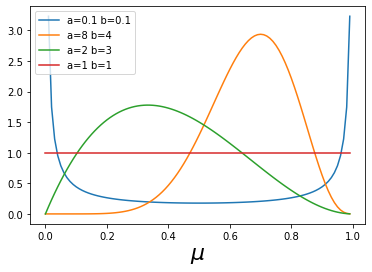

In [3]:
mus = arange(0,1,.01)

# Plot for various values of a and b
for ab in [(.1,.1),(8,4),(2,3), (1,1)]:
    plot(mus, vectorize(Beta)(mus,*ab), label="a=%s b=%s" % ab)

legend(loc=0)
xlabel(r"$\mu$", size=22)

Now define the Binomial, which gives our likelihood (as a function of $\mu$)

In [4]:
N, m = sym.symbols('N m')

Bin_norm = sym.binomial(N,m)
Bin_f = mu**m * (1-mu) ** (N-m)

Bin = sym.Lambda((m, N, mu), Bin_norm * Bin_f)

maths(r"\operatorname{Bin}(m|N,\mu) = ")
display(Bin.expr)

<IPython.core.display.Math object>

Ignoring normalisation for now, we can find the posterior distribution
by multiplying our Beta prior by the Binomial likelihood

In [5]:
p = Beta_f * Bin_f
p = p.powsimp()

maths(r"\operatorname{Beta}(\mu|a,b) \times \operatorname{Bin}(m|N,\mu) \propto %s" % sym.latex(p))

<IPython.core.display.Math object>

Let $l = N-m$ (the number of tails, if we are talking about coin tosses) then we can write it as

In [6]:
l = sym.Symbol('l')
p = p.subs(N-m, l)
p

So the posterior distribution has the same functional dependence on $\mu$ as the prior, it is just another Beta distribution

In [7]:
maths("p(\mu|m,l,a,b) \propto %s" % sym.latex(p))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

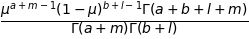

In [8]:
maths("p(\mu|m,l,a,b) = \operatorname{Beta}(\mu|a+m,b+l) =b")
Beta(mu,a+m,b+l)

Let's see how this works graphically, with prior a=2, b=2 and likelihood N=1, m=1

<IPython.core.display.Math object>

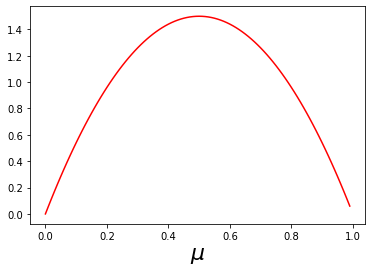

In [9]:
prior = Beta(mu,2,2)

plot(mus, (sym.lambdify(mu,prior))(mus), 'r')
xlabel("$\mu$", size=22)

maths("\mathbf{Prior}: \operatorname{Beta}(\mu|a=2,b=2) = %s" % sym.latex(prior))

<IPython.core.display.Math object>

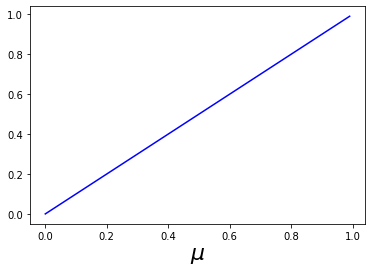

In [10]:
likelihood = Bin(1,1,mu)

plot(mus, (sym.lambdify(mu,likelihood))(mus), 'b')
xlabel("$\mu$", size=22)

maths("\mathbf{Likelihood}: \operatorname{Bin}(m=1|N=1,\mu) = %s" % sym.latex(likelihood))

<IPython.core.display.Math object>

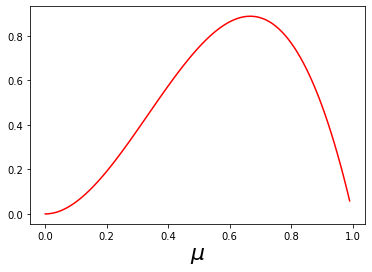

In [11]:
posterior = prior * likelihood

plot(mus, (sym.lambdify(mu,posterior))(mus), 'r')
xlabel("$\mu$", size=22)

maths(r"\mathbf{Posterior (unnormalised)}: \operatorname{Beta}(\mu|2,2) \times \operatorname{Bin}(1|1,\mu) = %s" % sym.latex(posterior))

<IPython.core.display.Math object>

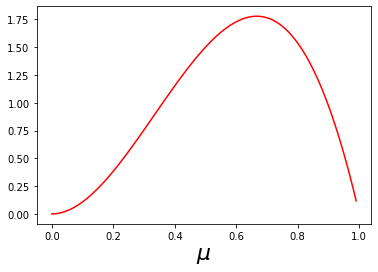

In [12]:
posterior = Beta(mu, 2+1, 2+0)

plot(mus, (sym.lambdify(mu,posterior))(mus), 'r')
xlabel("$\mu$", size=22)

maths(r"\mathbf{Posterior}: p(\mu|m,l,a,b) = p(\mu|1,0,2,2) = \operatorname{Beta}(\mu,2+1,2+0) = %s" % sym.latex(posterior))